# IBM Quantum Challenge: Spring 2023

## Primeros Pasos

¡Bienvenido al IBM Quantum Challenge: Spring 2023!

Esta iteración del IBM Quantum Challenge está dedicada a los circuitos dinámicos. Actualmente estás en el primer laboratorio del desafío. A medida que avances en los laboratorios, se te pedirá que completes algunos ejercicios. En esta sección introductoria, te daremos una breve descripción de cómo completar los ejercicios. Incluso si has participado en desafíos anteriores, es posible que desees revisar este material.

Todos los laboratorios contendrán una mezcla de contenido de tutoriales, bloques de código preescritos y bloques de código de ejercicio que requerirán que completes su propio código Qiskit. El código requerido para completar el ejercicio debe escribirse debajo de la línea que tiene el comentario _"### Your code goes here ###"_.

Si nunca antes has sido parte de un Desafío (Challenge), es importante tener en cuenta que debes ejecutar cada celda de código, incluso si no escribiste ningún código nuevo dentro. Esto asegura que cuando envíes tus respuestas ejecutando el calificador (grader), todo esté actualizado.

### Ejercicio de Muestra

En la siguiente celda, construimos un circuito con un solo qubit y un solo bit clásico. Tu primera tarea es ejecutar una compuerta Hadamard en el qubit y luego medirlo, almacenando el resultado en el bit clásico. Hemos completado el código por tí, todo lo que necesitas hacer es eliminar el `#` al comienzo de ambas líneas.

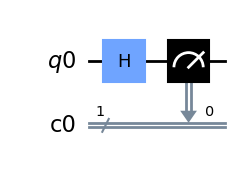

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

####### your code goes here #######

qc.h(qr[0])
qc.measure(qr[0], cr[0])


qc.draw("mpl")

¡Buen trabajo! Después de cada ejercicio necesitaremos averiguar si lo que escribiste es correcto. Para hacer esto, simplemente ejecute una celda calificadora.

Probémoslo. En la siguiente celda, te pedimos que establezcas un valor entero para la variable `answer_0`. Si el número entero está entre 1 y 5, el calificador (grader) te devolverá un mensaje felicitándote por encontrar la respuesta correcta. Si ingresas cualquier otro número, obtendrás el mensaje opuesto.

Establece la respuesta como desees y, a continuación, ejecuta la celda del calificador para ver los resultados. Puedes intentar esto varias veces con diferentes números para divertirte.

In [32]:
answer_0: int
answer_0 = 1

##### Hint: Recuerda ejecutar esta celda después de cambiar tu valor ###

In [3]:
# Celda Calificadora: ejecuta esto para enviar tu respuesta

from qc_grader.challenges.spring_2023 import grade_ex1a

grade_ex1a(answer_0)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Ahora ya está todo listo para comenzar este desafío. ¡Buena suerte y diviertete!

# Introducción a los Circuitos Dinámicos y Repetir hasta el éxito

## Introducción

Según el [libro de texto de Qiskit,](https://learn.qiskit.org/course/ch-algorithms/quantum-circuits)
>_"Un circuito cuántico es una rutina computacional que consta de operaciones cuánticas coherentes en qubits... Es una secuencia ordenada de compuertas cuánticas, mediciones y restablecimientos, todos los cuales pueden condicionarse y utilizar datos de la computación clásica en tiempo real."_

Es posible que no estés familiarizado con la última parte de la definición, pero tiene mucho que ver con los circuitos dinámicos. Por lo general, cuando hablamos de circuitos cuánticos, nos referimos a circuitos cuánticos _estáticos_, incluso si no lo decimos explícitamente. Entonces, ¿qué son los circuitos dinámicos?

Los **circuitos dinámicos** son circuitos cuánticos que contienen mediciones en medio del circuito donde los resultados de esas mediciones se usan para condicionar compuertas cuánticas más adelante en el circuito. La capacidad de condicionar futuras operaciones cuánticas en los resultados de las mediciones clásicas se conoce como feedforward clásico.

¿Por qué necesitamos feedforward clásico? Un ejemplo puede ayudar: Considera la operación de restablecimiento condicional, que puede sonarte familiar si alguna vez usaste la operación [`reset`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.reset.html) en Qiskit. Si bien la operación de restablecimiento es una operación no unitaria que restablece el qubit al estado cero sin importar el estado inicial, la operación de restablecimiento condicional se realiza en un qubit ya medido para restablecerlo a cero mediante la aplicación de una compuerta bit-flip X solo si el qubit está en el estado uno, según lo determinado a partir de su valor medido. El restablecimiento condicional puede ser una forma más rápida y menos propensa a errores de restablecer un qubit si ya se ha medido.

<center>
<img src="resources/sketch-1.png" width="50%">
</center>

Dicho de otra manera, los circuitos dinámicos son circuitos cuánticos que incluyen flujo de control, como declaraciones if y bucles while, donde los predicados se calculan a partir de los resultados de mediciones de qubit anteriores y las operaciones condicionales incluyen compuertas cuánticas.

## Hola Mundo de los Circuitos Dinámicos

El hardware de IBM Quantum ya admitía mediciones de circuito medio (mid-circuit) y restablecimiento desde hace algún tiempo. Sin embargo, agregar soporte para feedforward clásico requirió un rediseño significativo de los sistemas de control y la pila de software asociada. El soporte completo para circuitos dinámicos se introdujo solo el año pasado (2022).

En Qiskit, la sintaxis para programar circuitos dinámicos ha pasado por varias iteraciones y aún no se ha implementado el soporte completo. Actualmente, la única forma de acceder a todas las capacidades de los circuitos dinámicos es enviar programas escritos en OpenQASM 3. Sin embargo, en este desafío trabajaremos con lo que está disponible actualmente en Qiskit.

Una versión anterior de Qiskit introdujo la instrucción [`c_if()`](https://qiskit.org/documentation/stubs/qiskit.circuit.Instruction.c_if.html), pero esta sintaxis quedará obsoleta en favor del método más flexible [`if_test()`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.if_test.html) de QuantumCircuit, que es el método que usaremos principalmente en este desafío.

Para comenzar, vamos a revisar un ejemplo simple en el que usaremos esta función. Construiremos un circuito que demuestre la operación de restablecimiento condicional siguiendo los siguientes pasos:

1. Inicializa un circuito con 1 qubit y 2 bits clásicos. ($q_{0}$, $b_{0}$ y $b_{1}$)
2. Aplica una compuerta Hadamard a $q_{0}$.
3. Mide ese qubit y guarda el resultado en $b_{0}$.
4. Comienza un bloque `if_test` condicionado a que $b_{0}$ sea igual a 1.
5. En el bloque `if_test`, especifica la operación a realizar si se cumple la condición, en este caso, cambiando $q_{0}$ al estado 0.
6. Vuelve a medir $q_0$ en $b_{1}$ para comprobar que siempre obtenemos 0.

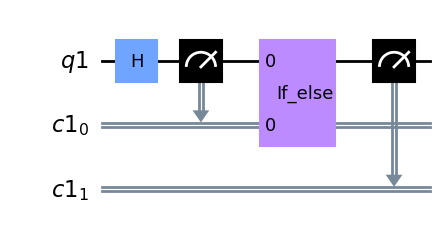

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(1)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# unpack the qubit and classical bits from the registers
(q0,) = qr
b0, b1 = cr

# apply Hadamard
qc.h(q0)
# measure
qc.measure(q0, b0)

# begin if test block. the contents of the block are executed if b0 == 1
with qc.if_test((b0, 1)):
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
    qc.x(q0)
# finally, measure q0 again
qc.measure(q0, b1)

qc.draw(output="mpl", idle_wires=False)

Ahora que nuestro circuito está construido, ejecutémoslo varias veces para ver si siempre obtenemos el resultado esperado. La primera medición puede ser 0 o 1, pero la segunda medición siempre debe ser 0.

In [3]:
from qiskit_aer import AerSimulator

# initialize the simulator
backend_sim = AerSimulator()

# run the circuit
reset_sim_job = backend_sim.run(qc)
# get the results
reset_sim_result = reset_sim_job.result()
# retrieve the bitstring counts
reset_sim_counts = reset_sim_result.get_counts()

print(f"Counts: {reset_sim_counts}")

Counts: {'00': 530, '01': 494}


Como era de esperar, el primer bit es a veces 0 y a veces 1, pero el segundo bit siempre es 0 (recuerda que Qiskit usa el ordenamiento de bits little-endian, de modo que el bit más a la derecha es el primer bit y el bit más a la izquierda es el último bit).

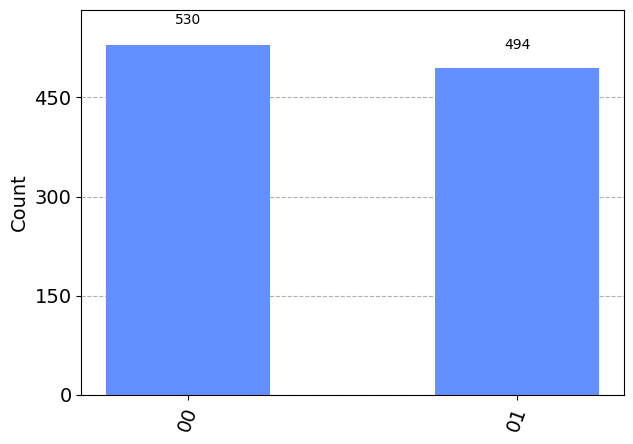

In [4]:
from qiskit.visualization import *

# plot histogram
plot_histogram(reset_sim_counts)

¡Ahora estás listo para construir tu primer circuito dinámico!

### **Ejercicio 1**

Nivelemos las cosas. Tu primera tarea será diseñar un circuito de dos qubits. En este caso, el objetivo será actuar de manera diferente sobre $q_{1}$ dependiendo del valor de $q_{0}$. Si la medición en $q_{0}$ es 0, aplica una compuerta $X$ en $q_{1}$. Si se lee 1, aplica una Hadamard en $q_{1}$ en su lugar.

Para que el valor de $q_{0}$ sea aleatorio, lo primero que haremos será aplicar una Hadamard en ese qubit. A continuación, mediremos $q_{0}$ en $b_{0}$. Después de eso, debería ocurrir la magia dinámica y, finalmente, se mide $q_{1}$.

Para este ejercicio, te recomendamos que leas la documentación de [`if_test()`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.if_test.html).

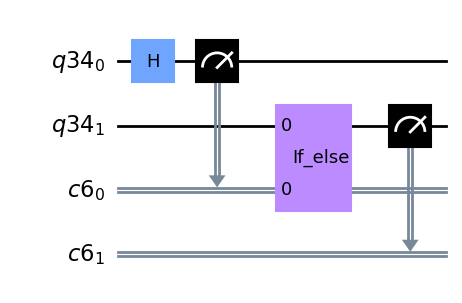

In [36]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

q0, q1 = qr
b0, b1 = cr

qc.h(q0)
qc.measure(q0, b0)

####### your code goes here #######
with qc.if_test((b0, 0)) as else_:
    qc.x(q1)
with else_:
    qc.h(q1)
    

qc.measure(q1, b1)
qc.draw(output="mpl", idle_wires=False)

Opcionalmente, puedes ejecutar la siguiente celda para verificar si tu circuito se comporta como se esperaba.
>Tip: Piensa en los posibles resultados del circuito antes de ejecutarlo.

In [37]:
backend_sim = AerSimulator()

job_1 = backend_sim.run(qc)
result_1 = job_1.result()
counts_1 = result_1.get_counts()

print(f"Counts: {counts_1}")

Counts: {'01': 264, '10': 510, '11': 250}


In [8]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex1b

grade_ex1b(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Repetir hasta el éxito

A veces, el resultado de un proceso es aleatorio y el resultado que obtienes no es el que deseabas. ¿Qué puedes hacer en este caso? Bueno, ¡puedes intentarlo de nuevo! Siempre que haya alguna probabilidad distinta de cero de tu resultado deseado, se garantiza que repetir el proceso devolverá el resultado que deseabas, eventualmente. A menudo, solo se necesitarán unas pocas repeticiones.

En esta sección, usaremos la idea de repetir hasta el éxito para construir una compuerta $R_X(\theta)$ a partir del conjunto finito de compuertas $\{H,\,X,\,S,\,\text{Toffoli} \}$, donde $\theta / \pi$ es un número irracional. Específicamente, tendremos $\cos\theta = \frac35$. Esta construcción es una adaptación de Nielsen y Chuang, _Quantum Computation and Quantum Information_, edición del 10<sup>o</sup> aniversario, ejercicio 4.41, y demuestra la universalidad del conjunto de compuertas finitas dado anteriormente.

La forma en que funciona la construcción es que construiremos un circuito que actúa sobre 3 qubits. Uno de los qubits es el qubit de destino y nuestro objetivo es realizar $R_X(\theta)$ en este qubit de destino. Los otros dos qubits son qubits "síndrome" ("syndrome") que mediremos y los resultados de la medición nos dirán si nuestra operación fue exitosa o no. Si ambos qubits del síndrome leen 0, sabremos que la compuerta se realizó con éxito. De lo contrario, restableceremos los qubits y volveremos a intentarlo. Necesitaremos circuitos dinámicos para condicionar las repeticiones del circuito a los resultados de la medición.

### Ejercicio 2

Your first task of this section will be to create a function that returns that circuit. Here there's an image of how the circuit should look like:
Tu primera tarea de esta sección será crear una función que devuelva ese circuito. Aquí hay una imagen de cómo debería verse el circuito:

<center>
<img src="resources/circuitRx.png">
</center>

Para facilitarte las cosas, configuraremos el circuito "base" para tí con los elementos necesarios. Las funciones que escribiremos en este laboratorio tomarán un circuito como entrada y lo modificarán en su lugar. Siempre que necesitemos un circuito nuevo, simplemente haremos una copia del circuito base.

In [38]:
controls = QuantumRegister(2, name="control")
target = QuantumRegister(1, name="target")


mid_measure = ClassicalRegister(2, name="mid")
final_measure = ClassicalRegister(1, name="final")

base = QuantumCircuit(controls, target, mid_measure, final_measure)

En la siguiente celda, completa la función `trial` para que construyas el circuito siguiendo los siguientes pasos:

1. Aplica una compuerta Hadamard a cada qubit del registro de control, así como al qubit objetivo.
2. Aplica la compuerta Toffoli (controlled-controlled-not) entre el registro de control y el qubit objetivo. Esto se puede lograr usando el método `ccx` de QuantumCircuit, o importando y usando `CCXGate` desde `qiskit.circuit.library`.
3. Aplica una compuerta $S$ al qubit objetivo.
4. Aplica otra compuerta Toffoli, con los mismos controles y objetivos que en el Paso 2.
5. De nuevo, aplica Hadamard a los registros de control y objetivo.
6. Mide el registro de control en el registro clásico.

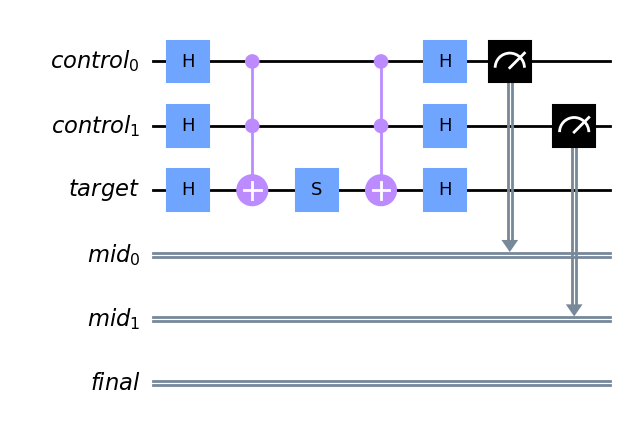

In [39]:
def trial(
    circuit: QuantumCircuit,
    target: QuantumRegister,
    controls: QuantumRegister,
    measures: ClassicalRegister,
):
    """Probabilistically perform Rx(theta) on the target, where cos(theta) = 3/5."""

    ####### your code goes here #######
    circuit.h(controls[0])
    circuit.h(controls[1])
    circuit.h(target)
    circuit.ccx(controls[0], controls[1], target)
    circuit.s(target)
    circuit.ccx(controls[0], controls[1], target)
    circuit.h(controls[0])
    circuit.h(controls[1])
    circuit.h(target)
    circuit.measure(controls[0], measures[0])
    circuit.measure(controls[1], measures[1])

qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
qc.draw("mpl", cregbundle=False)

In [17]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1c

grade_ex1c(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### Ejercicio 3

Tu próxima tarea será verificar las mediciones. Si ambas mediciones de los bits de control devuelven $|{0}\rangle$, la compuerta aplicada es $R_X(\theta)$ donde $\cos(\theta) = \frac{3}{5}$. Si alguna de las medidas es $|{1}\rangle$, entonces la compuerta aplicada es simplemente $X$, lo que indica una falla. Por lo tanto, podemos saber a partir de las mediciones si aplicamos la compuerta correcta, sin alterar la coherencia del qubit objetivo.

Si hay una falla, debemos restablecer el qubit y comenzar de nuevo. Dado que sabemos lo que se aplica en caso de falla, podemos usar este conocimiento para realizar el restablecimiento de manera eficiente, sin usar un restablecimiento de hardware general. Para los dos qubits auxiliares, esta es solo una compuerta $X$ condicionada a que su respectiva medida sea $1$.

En la siguiente celda, rellena la función `reset_controls` para que modifique el circuito siguiendo los siguientes pasos:

1. Si el primer bit del registro `measures` es igual a 1, aplica una compuerta $X$ al primer qubit de control.
2. Si el segundo bit del registro `measures` es igual a 1, aplica una compuerta $X$ al segundo qubit de control.

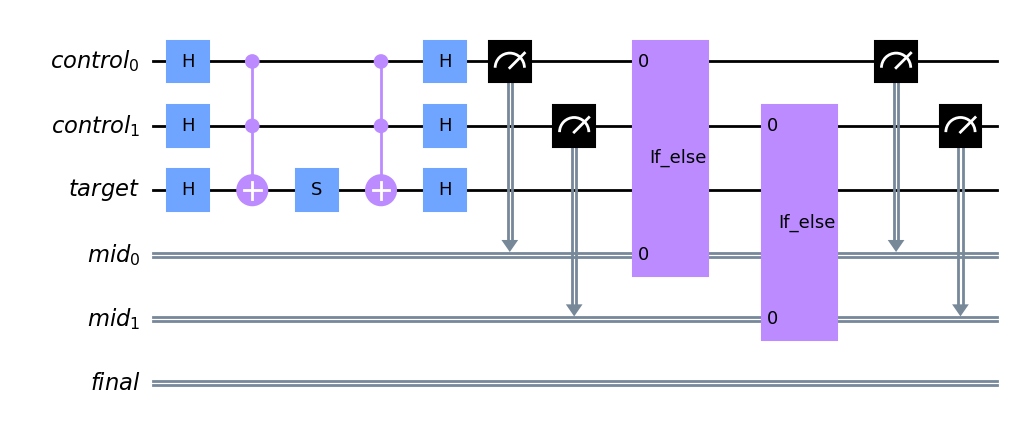

In [40]:
def reset_controls(
    circuit: QuantumCircuit, controls: QuantumRegister, measures: ClassicalRegister
):
    """Reset the control qubits if they are in |1>."""

    ####### your code goes here #######
    with circuit.if_test((measures[0], 1)):
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
        circuit.x(controls[0])
    
    with circuit.if_test((measures[1], 1)):
    # if the condition is satisfied (b0 == 1), then flip the bit back to 0
        circuit.x(controls[1])

qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
reset_controls(qc, controls, mid_measure)
qc.measure(controls, mid_measure)
qc.draw("mpl", cregbundle=False)

In [20]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1d

grade_ex1d(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Ahora todo lo que queda por hacer es repetir la ejecución del circuito si las condiciones no se cumplieron.
En el ejercicio final, necesitarás solucionar dos problemas en nuestro soporte actual para circuitos dinámicos.

El primer problema es que Qiskit actualmente no admite la realización de operaciones aritméticas o lógicas en bits clásicos. En particular, no admite comprobar que un registro clásico *no* tiene un cierto valor. En nuestra situación, necesitamos repetir la prueba solo si la medición del circuito medio *no* fue la cadena de bits `00`. Para solucionar este problema, crearemos una instrucción if condicionada a que la medición sea igual a `00`, **pasaremos** un bloque vacío y luego usaremos la rama **else** para realizar la lógica que queremos para el caso de que la medición *no* sea `00`.

El segundo problema es que nuestro hardware actualmente no admite bucles. Por lo tanto, no podemos ejecutar un verdadero bucle de repetición hasta el éxito. Solucionaremos este problema simplemente repitiendo nuestro circuito de prueba un número fijo de veces.

### Ejercicio 4

En la celda de código a continuación, completa el bloque `else` con la lógica que se debe realizar en caso de que la medición del síndrome indique que necesitamos repetir la prueba:

1. Restablece el qubit objetivo al estado cero. Recuerda, ya sabemos que está en el estado 1.
2. Vuelve a llamar a la función `trial` en el circuito.

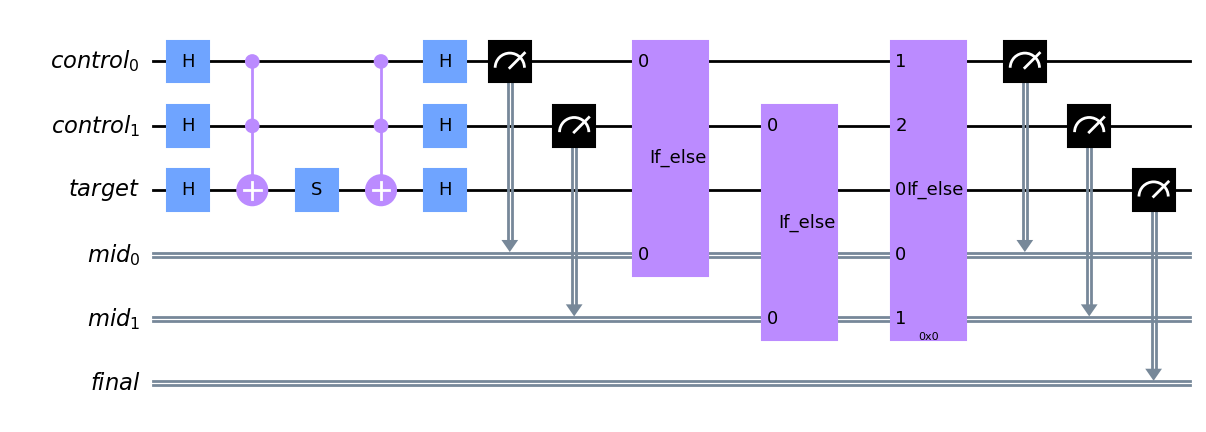

In [41]:
# Set the maximum number of trials
max_trials = 2

# Create a clean circuit with the same structure (bits, registers, etc)
# as the initial base we set up.
circuit = base.copy_empty_like()

# The first trial does not need to reset its inputs, since the controls
# are guaranteed to start in the |0> state.
trial(circuit, target, controls, mid_measure)

# Manually add the rest of the trials.  In the future, we will be
# able to use a dynamic `while` loop to do this, but for now, we
# statically add each loop iteration with a manual condition check
# on each one.  This involves more classical synchronizations than
# the while loop, but will suffice for now.
for _ in range(max_trials - 1):
    reset_controls(circuit, controls, mid_measure)
    with circuit.if_test((mid_measure, 0b00)) as else_:
        # This is the success path, but Qiskit can't directly
        # represent a negative condition yet, so we have an
        # empty `true` block in order to use the `else` branch.
        pass
    with else_:
        ####### your code goes here #######
        circuit.x(target)
        trial(circuit, target, controls, mid_measure)

# We need to measure the control qubits again to ensure we
# get their final results; this is a hardware limitation.
circuit.measure(controls, mid_measure)

# Finally, let's measure our target, to check that we're
# getting the rotation we desired.
circuit.measure(target, final_measure)

circuit.draw("mpl", cregbundle=False)

In [22]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1e

grade_ex1e(circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Ejecutemos el circuito en un simulador.

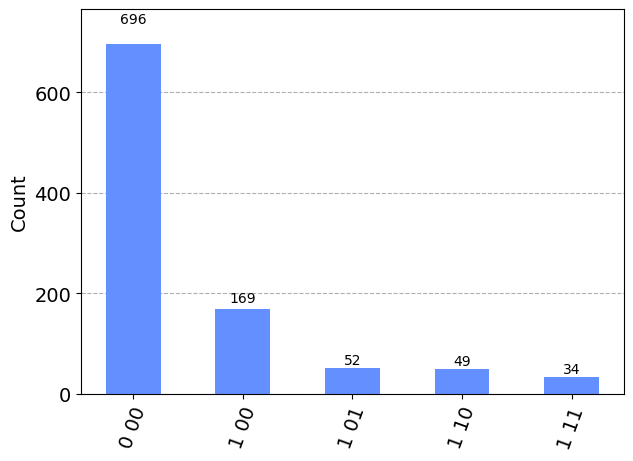

In [42]:
sim = AerSimulator()
job = sim.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

Un resultado exitoso es aquel en el que las mediciones en los dos controles terminan en el estado `00`. Si tienes problemas, te alentamos a que publiques tus resultados en el Canal de Discord y trates de comprender, en colaboración con otros participantes, qué significan tus resultados y por qué los estás obteniendo.

## Ejecutar en hardware

¡Intentemos ejecutar el circuito que hicimos en hardware real! Para esto, usaremos el dispositivo Peekskill de 27 qubits, que ha sido ajustado específicamente para circuitos dinámicos. Pero recuerda, la ejecución en hardware real lleva tiempo y, a veces, tiene errores. **No** ejecutes estas celdas una y otra vez, ya que eso generará un retraso para todos los demás participantes del Desafío.

In [27]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()

In [31]:
hub = "qc-spring-23-1"
group = "group-2"
project = "rec2LJgDcOPOGHtJs"

backend_name = "ibm_peekskill"
backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

In [50]:
from qiskit import transpile

qc_transpiled = transpile(circuit, backend)
job = backend.run(qc_transpiled, shots=1000, dynamic=True)

In [41]:
job = provider.backend.retrieve_job('chiipelnopt07g0i5f20')

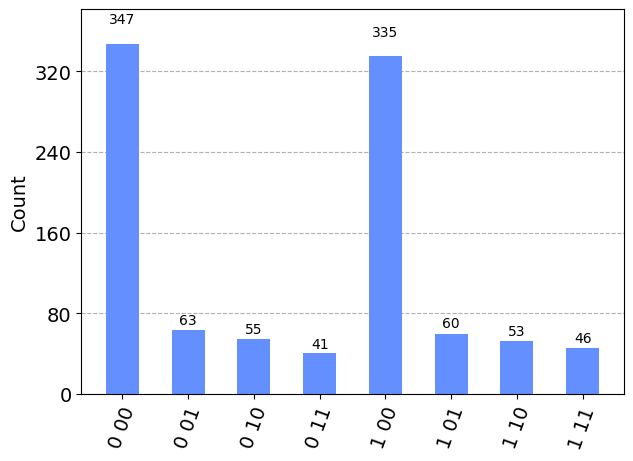

In [42]:

counts = job.result().get_counts()

plot_histogram(counts)

## ¡Felicidades!

¡Llegaste al final del primer laboratorio! Ahora que sabes más sobre circuitos dinámicos, es hora de pasar al siguiente laboratorio y comenzar a aprender sobre algunas aplicaciones y propiedades más avanzadas. ¡Buena suerte!